In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.figure_factory as ff #dedicated functions for creating very specific types of plots or unique charts
import plotly.express as px # provides functions to visualize a variety of types of data
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("fuel_consumption_ratings.csv")
df.head()

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200,6,3
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242,5,6
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230,5,7


In [4]:
df.shape

(946, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946 entries, 0 to 945
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Model Year                         946 non-null    int64  
 1   Make                               946 non-null    object 
 2   Model                              946 non-null    object 
 3   Vehicle Class                      946 non-null    object 
 4   Engine Size(L)                     946 non-null    float64
 5   Cylinders                          946 non-null    int64  
 6   Transmission                       946 non-null    object 
 7   Fuel Type                          946 non-null    object 
 8   Fuel Consumption (City (L/100 km)  946 non-null    float64
 9   Fuel Consumption(Hwy (L/100 km))   946 non-null    float64
 10  Fuel Consumption(Comb (L/100 km))  946 non-null    float64
 11  Fuel Consumption(Comb (mpg))       946 non-null    int64  

In [6]:
df.describe()

,Model Year,Engine Size(L),Cylinders,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
count,946.0,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000
mean,2022.0,3.198732,5.668076,12.506448,9.363319,11.092072,27.247357,259.172304,4.539112,4.950317
std,0.0,1.374814,1.932670,3.452043,2.285125,2.876276,7.685217,64.443149,1.471799,1.679842
min,2022.0,1.200000,3.000000,4.000000,3.900000,4.000000,11.000000,94.000000,1.000000,1.000000
25%,2022.0,2.000000,4.000000,10.200000,7.700000,9.100000,22.000000,213.250000,3.000000,3.000000
50%,2022.0,3.000000,6.000000,12.200000,9.200000,10.800000,26.000000,257.000000,5.000000,5.000000
75%,2022.0,3.800000,6.000000,14.700000,10.700000,12.900000,31.000000,300.750000,5.000000,6.000000
max,2022.0,8.000000,16.000000,30.300000,20.900000,26.100000,71.000000,608.000000,10.000000,7.000000


In [7]:
df.dtypes

Model Year                             int64
Make                                  object
Model                                 object
Vehicle Class                         object
Engine Size(L)                       float64
Cylinders                              int64
Transmission                          object
Fuel Type                             object
Fuel Consumption (City (L/100 km)    float64
Fuel Consumption(Hwy (L/100 km))     float64
Fuel Consumption(Comb (L/100 km))    float64
Fuel Consumption(Comb (mpg))           int64
CO2 Emissions(g/km)                    int64
CO2 Rating                             int64
Smog Rating                            int64
dtype: object

# Data Cleaning

In [8]:
df.isnull().sum()

Model Year                           0
Make                                 0
Model                                0
Vehicle Class                        0
Engine Size(L)                       0
Cylinders                            0
Transmission                         0
Fuel Type                            0
Fuel Consumption (City (L/100 km)    0
Fuel Consumption(Hwy (L/100 km))     0
Fuel Consumption(Comb (L/100 km))    0
Fuel Consumption(Comb (mpg))         0
CO2 Emissions(g/km)                  0
CO2 Rating                           0
Smog Rating                          0
dtype: int64

# Skewness

In [9]:
from scipy import stats
skew=stats.skew(df.describe())
print('skewness:',skew)


skewness: [-1.51045033  2.2675994   2.26703017  2.26494545  2.26650879  2.26572223
  2.25216061  1.18361657  2.26747115  2.26761018]


# Correlation

In [10]:
correlation=stats.spearmanr(df.describe(),df.describe())
print('correlation :', correlation)

correlation : SignificanceResult(statistic=array([[ 1.        , -0.03117398,  0.10976426,  0.10910895,  0.10910895,
         0.10910895,  0.10910895,  0.10910895, -0.03136122, -0.03117398,
         1.        , -0.03117398,  0.10976426,  0.10910895,  0.10910895,
         0.10910895,  0.10910895,  0.10910895, -0.03136122, -0.03117398],
       [-0.03117398,  1.        ,  0.93414848,  0.97619048,  0.97619048,
         0.97619048,  0.97619048,  0.97619048,  0.95810101,  0.97619048,
        -0.03117398,  1.        ,  0.93414848,  0.97619048,  0.97619048,
         0.97619048,  0.97619048,  0.97619048,  0.95810101,  0.97619048],
       [ 0.10976426,  0.93414848,  1.        ,  0.95810101,  0.95810101,
         0.95810101,  0.95810101,  0.95810101,  0.97590361,  0.97007727,
         0.10976426,  0.93414848,  1.        ,  0.95810101,  0.95810101,
         0.95810101,  0.95810101,  0.95810101,  0.97590361,  0.97007727],
       [ 0.10910895,  0.97619048,  0.95810101,  1.        ,  1.        ,
     

# Outliers

In [11]:
Q1=np.percentile(df.describe(),10)
Q2=np.percentile(df.describe(),20)
Q3=np.percentile(df.describe(),50)

In [13]:
IQR = Q3-Q1
print('Q1:', Q1)
print('Q2:', Q2)
print('Q3:', Q3)
print('IQR :', IQR)
plt.show()

Q1: 1.9932669809105164
Q2: 3.4013810484661304
Q3: 10.45
IQR : 8.456733019089484


# Graphs using EDA

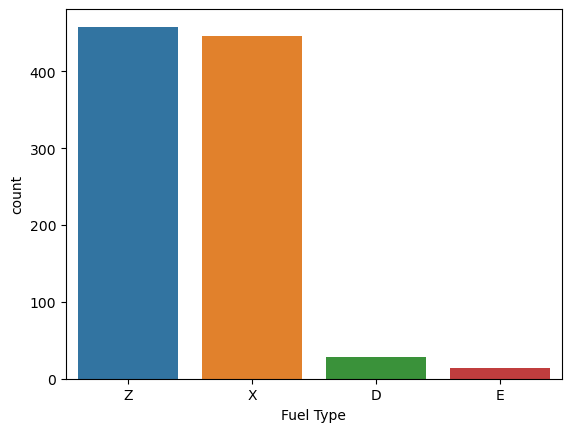

In [21]:
sns.countplot(x='Fuel Type', data=df)
plt.show()

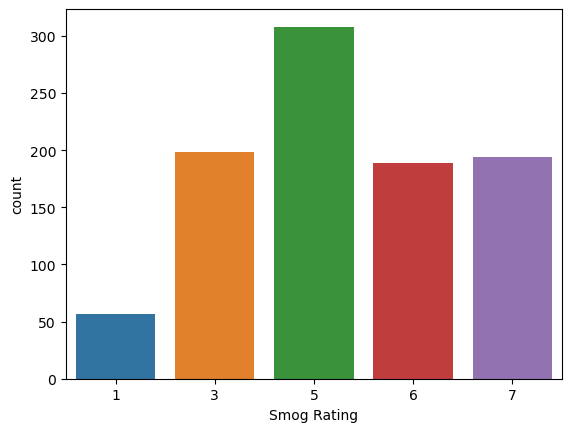

In [20]:
sns.countplot(x='Smog Rating', data=df)
plt.show()

In [34]:
fig = px.histogram(df, x="Make", color="Make")
fig.update_layout(xaxis_title="Vehicle", yaxis_title="Counts")
fig.show()

In [36]:
fig =px.pie(df, names= 'Fuel Type', title='Fuel type',
           hole= 0.5, opacity=0.9)
fig.show()

In [39]:
fig =px.pie(df, names= 'Transmission', title='Transmission',
           hole= 0.3, opacity=0.9)
fig.show()

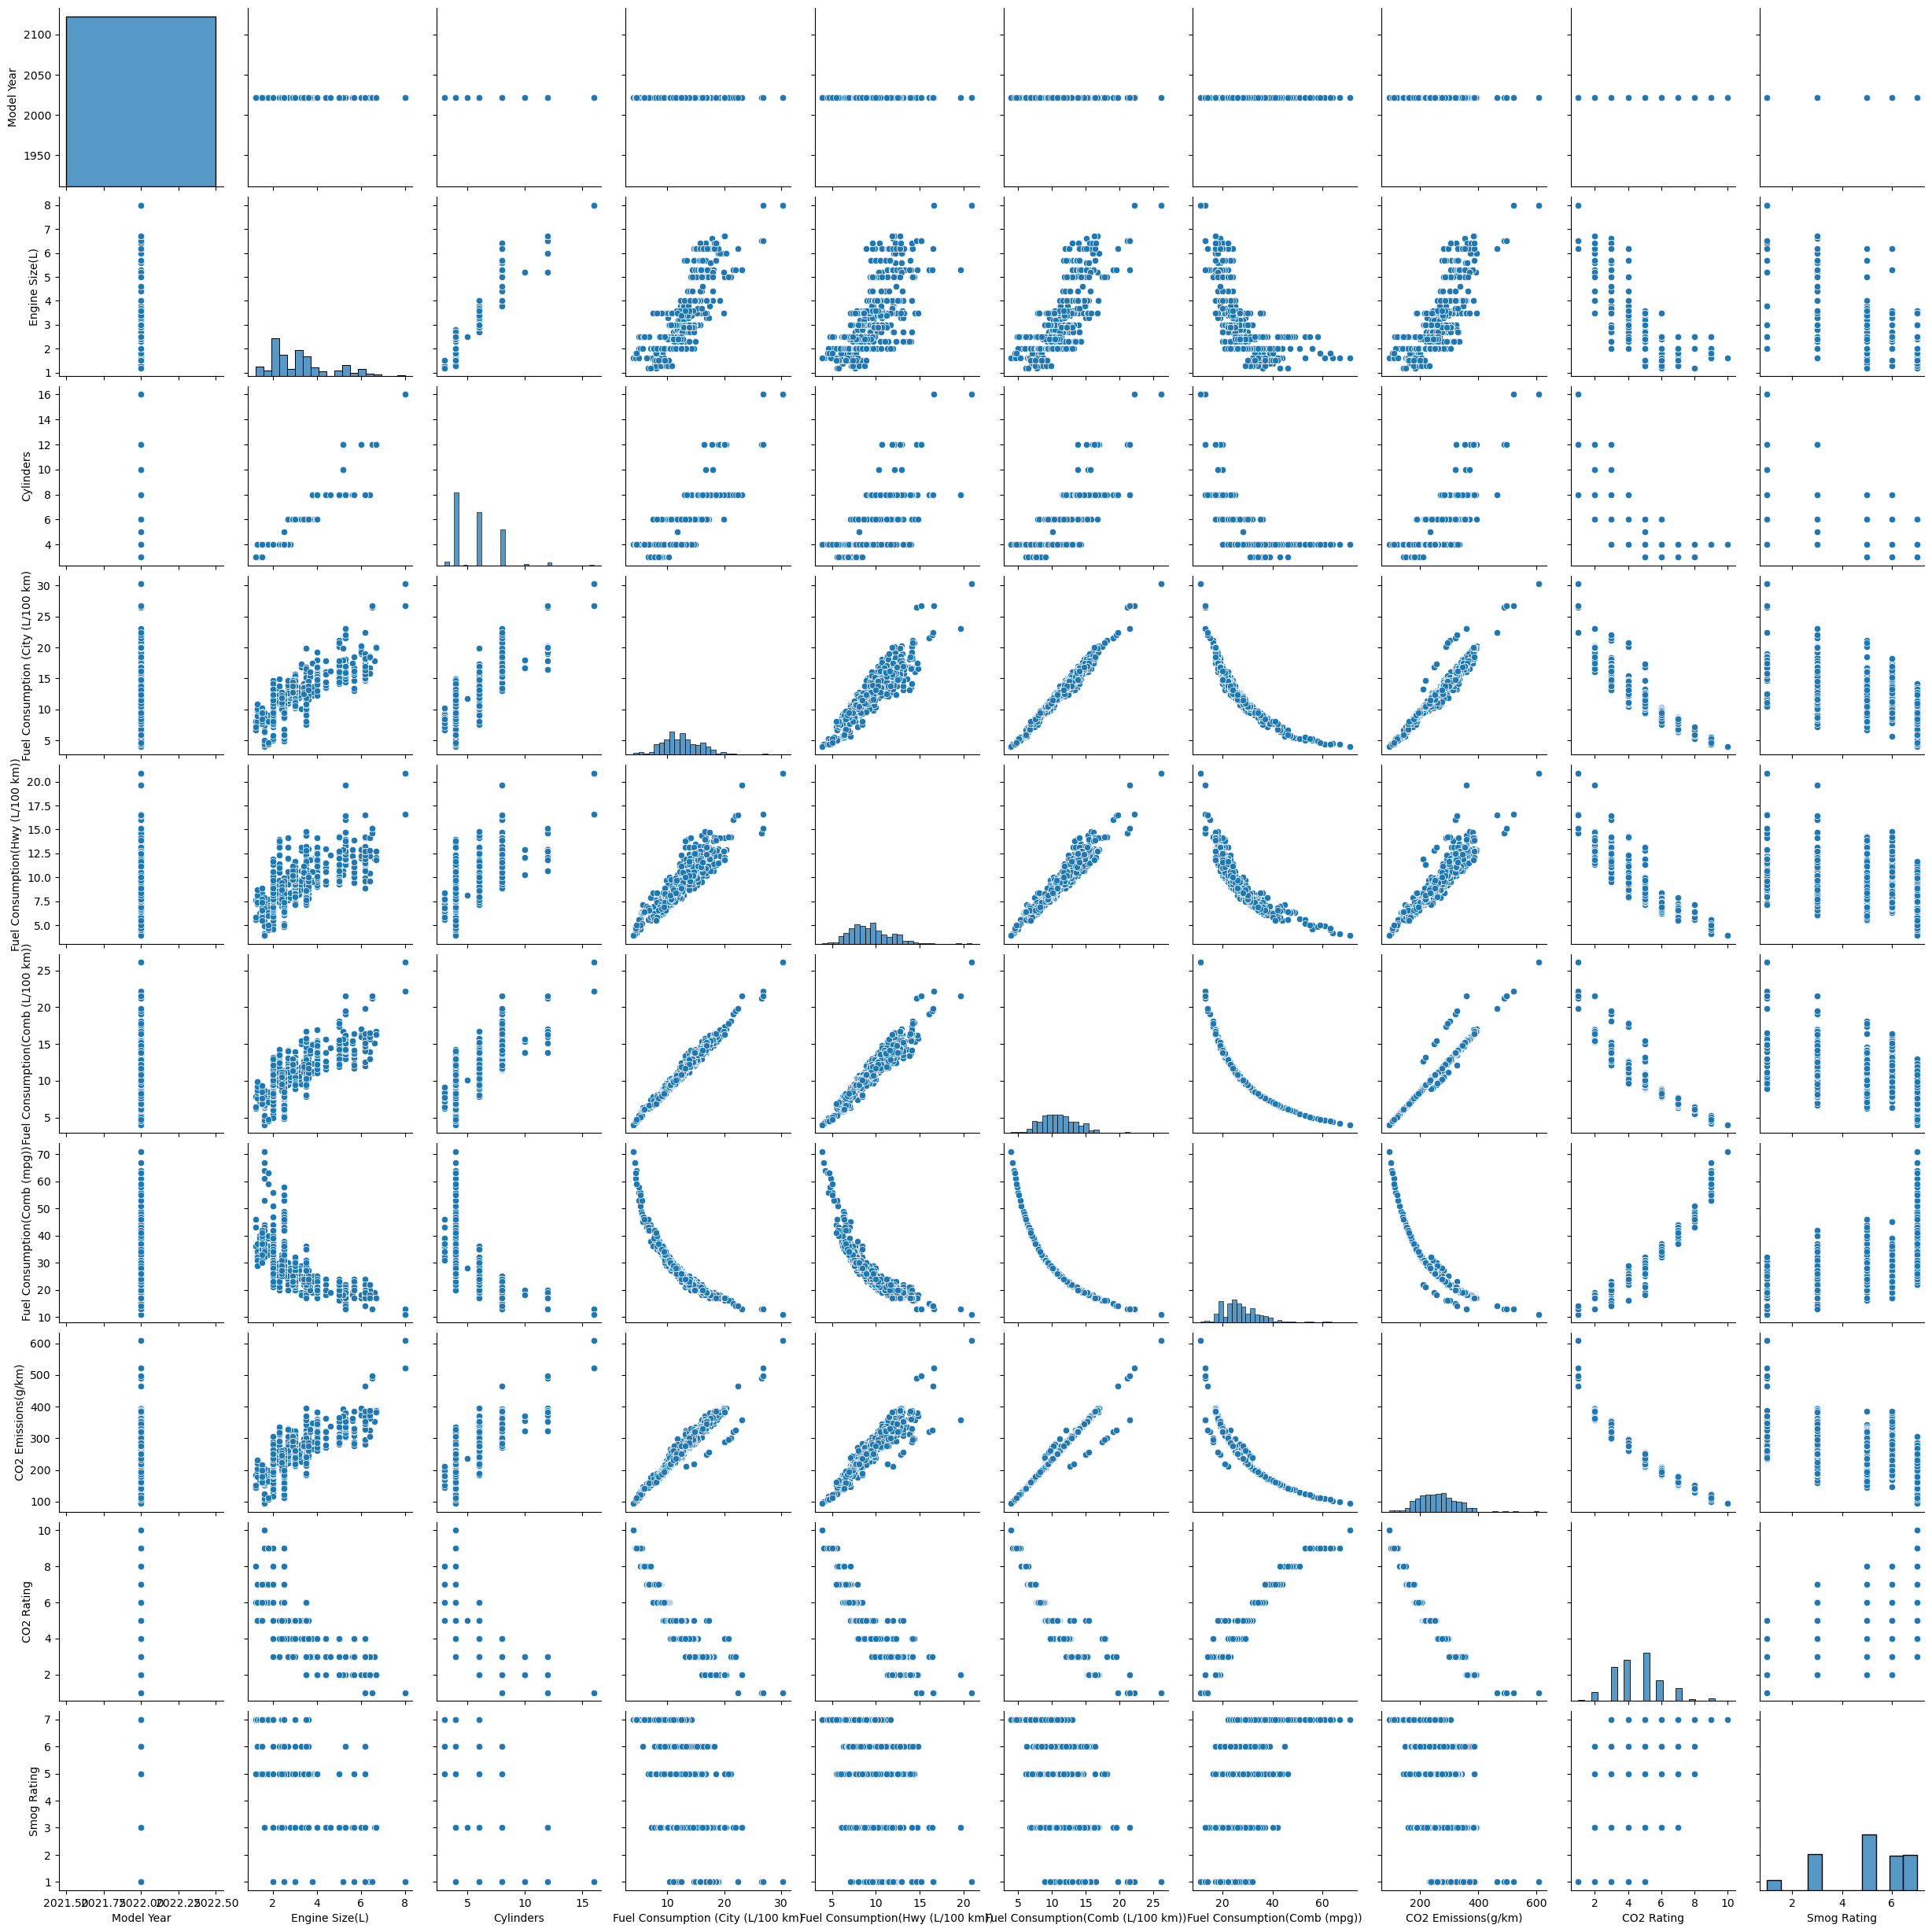

In [40]:
sns.pairplot(df)

# Train and Test Model

In [42]:
df

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200,6,3
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242,5,6
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230,5,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,2022,Volvo,XC40 T5 AWD,SUV: Small,2.0,4,AS8,Z,10.7,7.7,9.4,30,219,5,5
942,2022,Volvo,XC60 B5 AWD,SUV: Small,2.0,4,AS8,Z,10.5,8.1,9.4,30,219,5,5
943,2022,Volvo,XC60 B6 AWD,SUV: Small,2.0,4,AS8,Z,11.0,8.7,9.9,29,232,5,7
944,2022,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4,AS8,Z,11.5,8.4,10.1,28,236,5,5


In [53]:
cat_cols = ['Model Year','Make','Model','Vehicle Class','Transmission','Fuel Type','Fuel Consumption (City (L/100 km)','Fuel Consumption(Hwy (L/100 km))','Fuel Consumption(Comb (L/100 km))','Fuel Consumption(Comb (mpg))','CO2 Emissions(g/km)','CO2 Rating']
encoder = OneHotEncoder(drop = 'first' , sparse=False)
encoded_cols =pd.DataFrame(encoder.fit_transform(df[cat_cols]),
                          columns=encoder.get_feature_names_out(cat_cols))

In [54]:
num_cols = ['Engine Size(L)','Cylinders']
scaler = StandardScaler()
scaled_cols = pd.DataFrame(scaler.fit_transform(df[num_cols]),columns=num_cols)

In [56]:
x = pd.concat([encoded_cols,scaled_cols],axis=1)
y = df['Smog Rating']


In [57]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=25)

In [58]:
model = LinearRegression()

In [59]:
model.fit(x_train, y_train)

LinearRegression()

In [60]:
y_pred = model.predict(x_test)

In [61]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print("R2 Score : ", r2)
print("MAE : ", mae)
print("MSE : ", mse)
print("RMSE : ", rmse)

R2 Score :  0.49307786513426344
MAE :  0.9216187497808909
MSE :  1.6090775765132932
RMSE :  1.2684942161922903


# Lasso Regression 

In [62]:
lasso_model=Lasso()


In [63]:
lasso_model.fit(x_train,y_train)

Lasso()

In [64]:
y_pred = lasso_model.predict(x_test)

In [65]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print("R2 Score : ", r2)
print("MAE : ", mae)
print("MSE : ", mse)
print("RMSE : ", rmse)

R2 Score :  -0.001248919903771517
MAE :  1.3690058479532166
MSE :  3.1781748610208655
RMSE :  1.7827436330052804


# Ridge Regression 

In [66]:
ridge_model=Ridge()

In [67]:
ridge_model.fit(x_train,y_train)

Ridge()

In [68]:
y_pred = ridge_model.predict(x_test)

In [69]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print("R2 Score : ", r2)
print("MAE : ", mae)
print("MSE : ", mse)
print("RMSE : ", rmse)

R2 Score :  0.5801925397236668
MAE :  0.8621260129139274
MSE :  1.3325572594350343
RMSE :  1.1543644396095343


# Elastic Net Regression 

In [70]:
el_model=ElasticNet()

In [71]:
el_model.fit(x_train,y_train)

ElasticNet()

In [72]:
y_pred = el_model.predict(x_test)

In [73]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print("R2 Score : ", r2)
print("MAE : ", mae)
print("MSE : ", mse)
print("RMSE : ", rmse)

R2 Score :  0.09238949452520173
MAE :  1.3399412066614151
MSE :  2.8809468202728987
RMSE :  1.6973352115221374
